# Extracting vega lite from altair

Let's create an example altair chart:

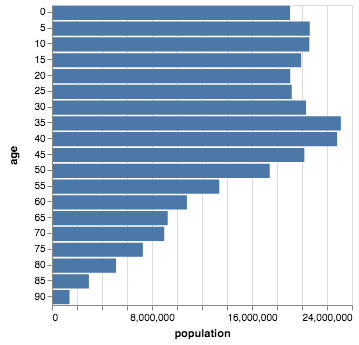

In [1]:
import altair as alt
from altair.expr import datum

from vega_datasets import data
pop = data.population.url

alt.renderers.enable('default')
c = alt.Chart(pop).mark_bar().encode(
    x=alt.X('sum(people):Q', axis=alt.Axis(title='population')),
    y='age:O'
).properties(
    height=300,
    width=300
).transform_filter(
    datum.year == 2000
)
c

Now let's look at the json representation of the vega lite:

In [2]:
alt.renderers.enable('json')
c


<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Let's now render this but instead extract transformations out to the top level of the vega lite spec:

In [4]:
import omnisci_renderer
alt.renderers.enable('extract-json')
c

<IPython.core.display.JSON object>

Now we see transformations at the top here.

We can also plot this transformed chart, which looks the same:

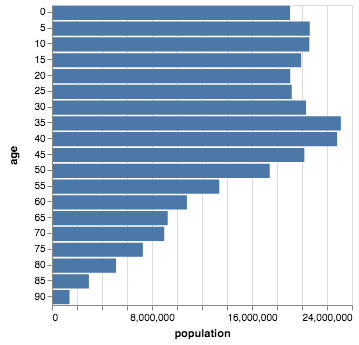

In [5]:
alt.renderers.enable('extract')
c